Cell 1: Setup - Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for all plots
sns.set_style("whitegrid")

# Load the dataset
df = pd.read_csv('data/netflix_titles.csv')
print("Dataset loaded successfully.")

# Display initial information about the dataframe
df.info()

Dataset loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Cell 2: Data Cleaning and Preprocessing

In [2]:
# Handle missing values in 'date_added' as it's crucial for time-series analysis
df.dropna(subset=['date_added'], inplace=True)

# Correct the 'date_added' data type
# First, strip any leading/trailing whitespace that might cause errors
df['date_added'] = df['date_added'].str.strip()

# Then, convert the cleaned column to datetime objects
df['date_added'] = pd.to_datetime(df['date_added'])

# Feature Engineering: Extract the year a title was added
df['year_added'] = df['date_added'].dt.year

print("\nData cleaning and preprocessing complete.")


Data cleaning and preprocessing complete.


Cell 3: Analysis 1 - Movies vs. TV Shows

type
Movie      6131
TV Show    2666
Name: count, dtype: int64


/var/folders/1l/w0l2h4b54p9blc640vdwhzmh0000gn/T/ipykernel_96092/3347573800.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis', order=type_counts.index)


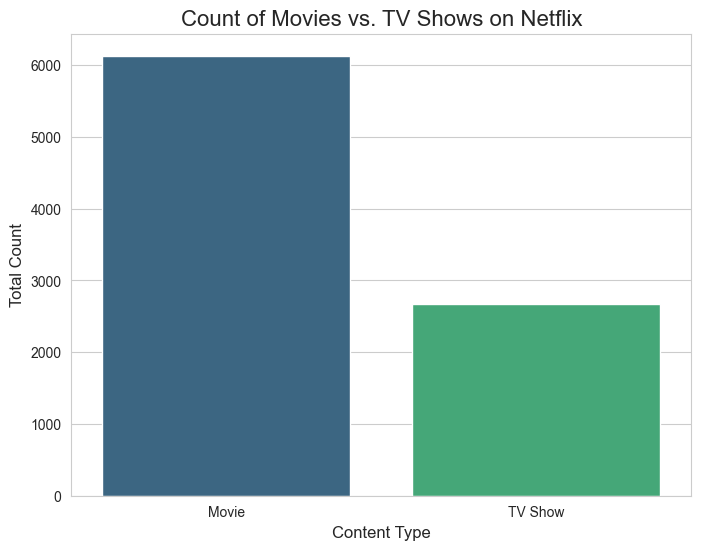

In [3]:
# Get the count of each content type
type_counts = df['type'].value_counts()
print(type_counts)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='viridis', order=type_counts.index)
plt.title('Count of Movies vs. TV Shows on Netflix', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.show()

Cell 4: Analysis 2 - Top 10 Content Producing Countries

country
United States     3683
India             1046
United Kingdom     803
Canada             445
France             393
Japan              317
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


/var/folders/1l/w0l2h4b54p9blc640vdwhzmh0000gn/T/ipykernel_96092/2566936540.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='mako')


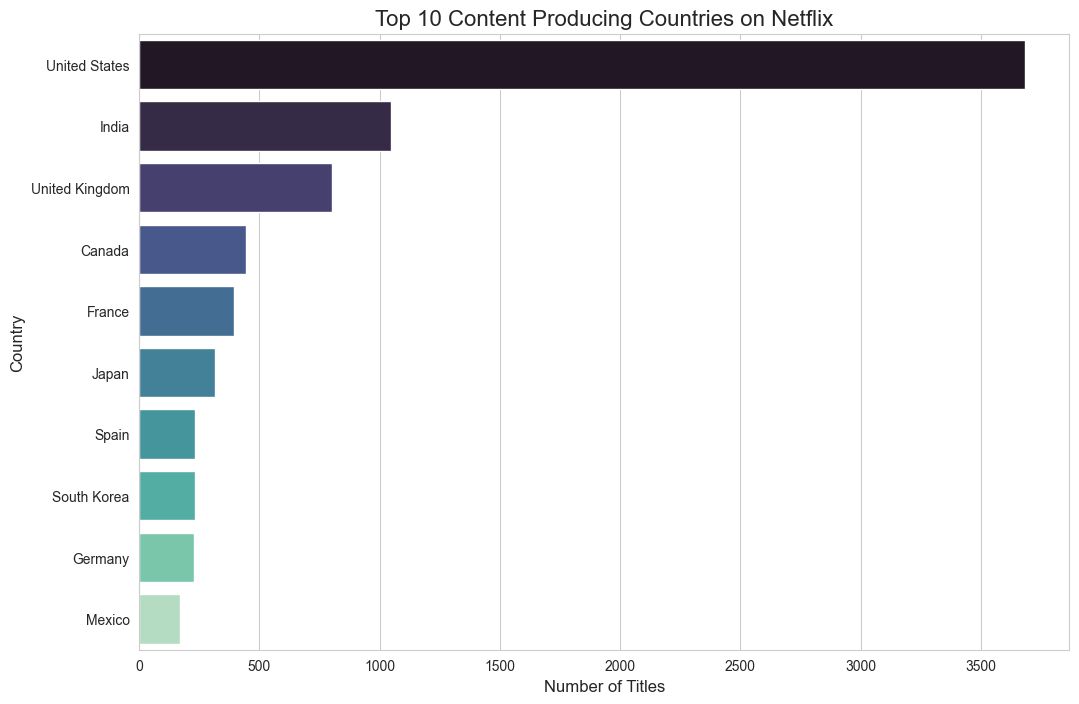

In [4]:
# Drop rows where country is null to avoid errors
countries_df = df.dropna(subset=['country'])

# Split multi-country strings and count each country individually
country_counts = countries_df['country'].str.split(', ').explode().value_counts()
top_10_countries = country_counts.head(10)
print(top_10_countries)

# Plot the top 10 countries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='mako')
plt.title('Top 10 Content Producing Countries on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

Cell 5: Analysis 3 - Content Added Over The Years

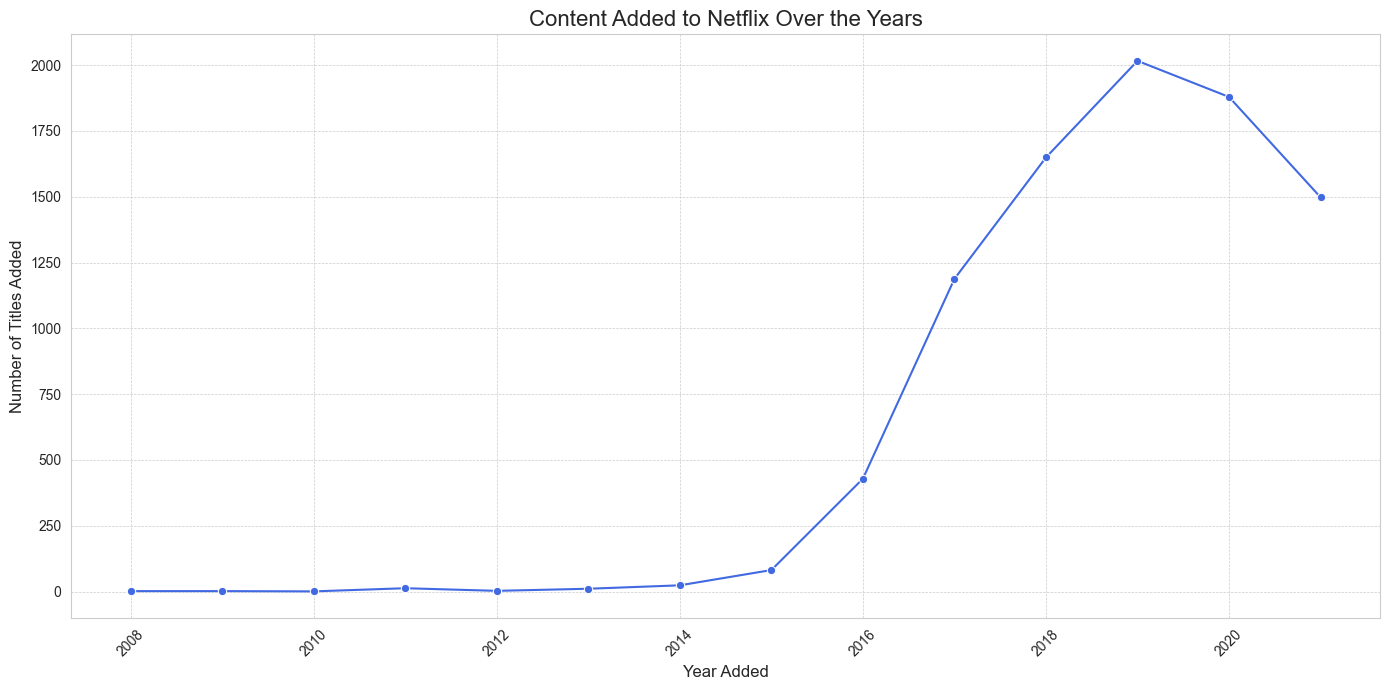

In [5]:
# Count how many titles were added each year and sort by year
yearly_counts = df['year_added'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(14, 7))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='royalblue')
plt.title('Content Added to Netflix Over the Years', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ensure x-axis ticks are displayed as integers
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()